In the other notebook: <span style= "color: blue">**Anomaly_detection**</span>, we discussed various way of handling data imbalances including Random oversampling or SMOTE. In this notebook, we will explore an alternative ensemble model called <span style ="color: blue">**CatBoost**</span>. It has built in data imbalance handling features.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
...,...,...,...,...
15825,1429756073,44,False,53.624115
15826,1429756373,45,False,59.752296
15827,1429756673,48,False,52.147630
15828,1429756973,26,False,58.007545


In [4]:
#Converting the datetime from integer to datetime unit
df['datetime']=pd.to_datetime(df['timestamp'], unit='s')
df['hour']=df['datetime'].apply(lambda x: x.hour)
df['day_of_week'] = df['datetime'].apply(lambda x: x.weekday())
df

,timestamp,value,is_anomaly,predicted,datetime,hour,day_of_week
0,1425008573,42,False,44.072500,2015-02-27 03:42:53,3,4
1,1425008873,41,False,50.709390,2015-02-27 03:47:53,3,4
2,1425009173,41,False,81.405120,2015-02-27 03:52:53,3,4
3,1425009473,61,False,39.950367,2015-02-27 03:57:53,3,4
4,1425009773,44,False,35.350160,2015-02-27 04:02:53,4,4
...,...,...,...,...,...,...,...
15825,1429756073,44,False,53.624115,2015-04-23 02:27:53,2,3
15826,1429756373,45,False,59.752296,2015-04-23 02:32:53,2,3
15827,1429756673,48,False,52.147630,2015-04-23 02:37:53,2,3
15828,1429756973,26,False,58.007545,2015-04-23 02:42:53,2,3


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from catboost import CatBoostClassifier

In [14]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Define features and target
X = df[['hour', 'day_of_week', 'timestamp', 'value', 'predicted']]
y = df['is_anomaly']

# Convert boolean values to integers for true labels
y = y.astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Create and train the CatBoost classifier
classifier = CatBoostClassifier(scale_pos_weight=20, verbose=0)
classifier.fit(X_train, y_train)

# Predict anomalies on the testing set
y_pred = classifier.predict(X_test)

target_names = ['Normal', 'Anomaly']

# Convert predicted labels from strings to integers
y_pred = y_pred.astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[  67   13]
 [  39 1464]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98      1503
     Anomaly       0.63      0.84      0.72        80

    accuracy                           0.97      1583
   macro avg       0.81      0.91      0.85      1583
weighted avg       0.97      0.97      0.97      1583



In [20]:
df_test=pd.read_csv("test.csv")
#Converting the datetime from integer to datetime unit
df_test['datetime']=pd.to_datetime(df['timestamp'], unit='s')
df_test['hour']=df_test['datetime'].apply(lambda x: x.hour)
df_test['day_of_week'] = df_test['datetime'].apply(lambda x: x.weekday())
df_test

,timestamp,value,predicted,datetime,hour,day_of_week
0,1396332000,20.00000,20.000000,2015-02-27 03:42:53,3,4
1,1396332300,20.00000,20.000000,2015-02-27 03:47:53,3,4
2,1396332600,20.00000,20.000000,2015-02-27 03:52:53,3,4
3,1396332900,20.00000,20.000000,2015-02-27 03:57:53,3,4
4,1396333200,20.00000,20.000000,2015-02-27 04:02:53,4,4
...,...,...,...,...,...,...
3955,1397518500,20.00384,19.836240,2015-03-12 21:17:53,21,3
3956,1397518800,20.00384,19.207998,2015-03-12 21:22:53,21,3
3957,1397519100,20.00384,20.103437,2015-03-12 21:27:53,21,3
3958,1397519400,20.00384,19.346764,2015-03-12 21:32:53,21,3


In [21]:
X_test=df_test[['hour', 'day_of_week', 'timestamp', 'value', 'predicted']]
classifier.predict(X_test)
# Predict anomalies on the testing set
y_pred = classifier.predict(X_test)
df_test['is_anomaly'] = [True if pred == 1 else False for pred in y_pred]
df_test


,timestamp,value,predicted,datetime,hour,day_of_week,is_anomaly
0,1396332000,20.00000,20.000000,2015-02-27 03:42:53,3,4,False
1,1396332300,20.00000,20.000000,2015-02-27 03:47:53,3,4,False
2,1396332600,20.00000,20.000000,2015-02-27 03:52:53,3,4,False
3,1396332900,20.00000,20.000000,2015-02-27 03:57:53,3,4,False
4,1396333200,20.00000,20.000000,2015-02-27 04:02:53,4,4,False
...,...,...,...,...,...,...,...
3955,1397518500,20.00384,19.836240,2015-03-12 21:17:53,21,3,False
3956,1397518800,20.00384,19.207998,2015-03-12 21:22:53,21,3,False
3957,1397519100,20.00384,20.103437,2015-03-12 21:27:53,21,3,False
3958,1397519400,20.00384,19.346764,2015-03-12 21:32:53,21,3,False


<Axes: xlabel='predicted', ylabel='value'>

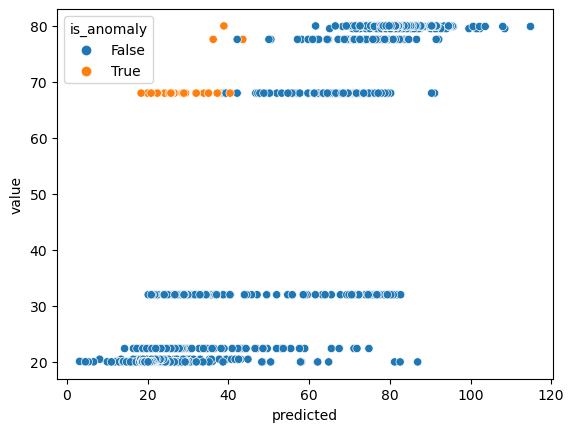

In [22]:
#Visualizing the data points
sns.scatterplot(data = df_test, x='predicted', y='value', hue = 'is_anomaly')

<span style= "color: blue">**Conclusion**</span>

This gives by far the best recall score, which is necessary for the business to determine the anomalies.